# Mental Health Sentiment Analysis
### Using pre-trained model
Reference : https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus

In [ ]:
# Import Google Colab Driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Check current directory
# !cd "/content/drive/My Drive/ALL ABOUT KULIAH"
!pwd

/content


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

# Data Loading & Exploration (EDA)

In [ ]:
# Load data from Google Drive
data = pd.read_csv('/content/drive/My Drive/ALL ABOUT KULIAH/mental_health.csv')
data.head(10)

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
5,hey rredflag sure right place post this goes ...,1
6,feel like someone needs hear tonight feeling r...,0
7,deserve liveif died right noone would carei re...,1
8,feels good ive set dateim killing friday nice ...,1
9,live guiltok made stupid random choice its ge...,1


In [ ]:
data.shape

(27977, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


In [ ]:
data.describe()

,label
count,27977.000000
mean,0.494621
std,0.499980
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
duplicate_index = []
index = 0
for i in data.duplicated():
  if i == True:
    text = data['text'][index]
    print(f'Duplicated in index {index} : {text}')
    duplicate_index.append(index)
  index += 1
print(f'Duplicated index : {duplicate_index}')

Duplicated in index 12573 : real suppleroot hours  up day far
Duplicated in index 22389 : real suppleroot hours  up day far
Duplicated in index 22603 : posting ara ara forget day  ara ara
Duplicated in index 24502 : happy birthday everyone birthday st october happy birthday everyone birthday st octoberhappy birthday everyone birthday st october
Duplicated in index 24970 : need help anyone good pythagriam tribometry  half hours need help discord ahappysleepdeprivednerd someone could help get done would great
Duplicated index : [12573, 22389, 22603, 24502, 24970]


In [ ]:
print(f'Data length before drop : {len(data)}')
len_before = len(data)
data = data.drop(duplicate_index)
print(f'Data length after drop : {len(data)}')
print(f'Removed {len_before - len(data)} row(s).')

Data length before drop : 27977
Data length after drop : 27972
Removed 5 row(s).


Total of negative : 13838
Total of positive : 14134


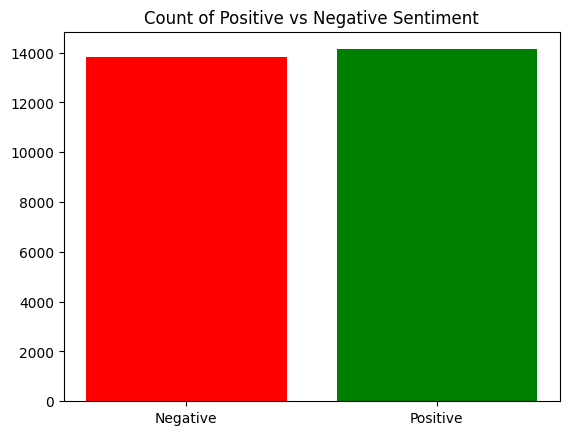

In [ ]:
data_neg = len(data[data['label'] == 1])
data_pos = len(data[data['label'] == 0])

print(f'Total of negative : {data_neg}')
print(f'Total of positive : {data_pos}')

plt.bar(['Negative' , 'Positive'], [data_neg , data_pos] , color = ['red' , 'green'])
plt.title('Count of Positive vs Negative Sentiment')
plt.show()

# Data Preprocessing



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Create a copy data in case we messed up
data_clone = data
data_clone.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [ ]:
# Clean the text data by removing unnecessary characters, converting text to lowercase, and handling any special cases.
def clean_text(text):
  # Remove punctuation
  clean_text = text.translate(str.maketrans('', '', string.punctuation))

  # Convert to lowercase
  clean_text = clean_text.lower()

  return clean_text

In [ ]:
# Tokenize the text data by splitting it into individual words or tokens. This allows for further analysis on a per-word basis.

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [ ]:
# Remove stopwords, which are common words that do not carry much meaning, from the tokenized text. This helps reduce noise in the data.

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

In [ ]:
# Lemmatize the tokens to convert them to their base or dictionary form. This helps in standardizing the words and reducing dimensionality.

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [ ]:
def preprocess_text(text):
    # Clean text
    cleaned_text = clean_text(text)

    # Tokenize text
    tokens = tokenize_text(cleaned_text)

    # Remove stopwords
    filtered_tokens = remove_stopwords(tokens)

    # Lemmatize tokens
    lemmatized_tokens = lemmatize_tokens(filtered_tokens)

    # Return preprocessed text
    return lemmatized_tokens

preprocessed_data = []
error_index = []
# print(len(data_clone))

data_text = data['text']
data_label = data['label']

for i in range(0, len(data)-1):
  try:
    preprocessed_data.append(preprocess_text(data['text'][i]))
  except:
    # print(f'INDEX {i}\nLABEL : {data_label[i]}\nTEXT : {data_text[i]}')
    print(f'ERROR RAISED in index {i}')
    error_index.append(i)

ERROR RAISED in index 12573
ERROR RAISED in index 22389
ERROR RAISED in index 22603
ERROR RAISED in index 24502
ERROR RAISED in index 24970


In [ ]:
# print(error_index)
data_text = data['text']
data_label = data['label']

print(data_clone[data_clone.index == 2239])

data_clone.isna().sum()

# Conclusion : ERROR RAISED IN DROPPED ROWS

                                                   text  label
2239  one main reason im still im afraid afteri read...      1


text     0
label    0
dtype: int64

# Load Pre-Trained Model (RoBERTa)
### Notes : Model still messed up, output as not expected
We are using the **'roberta-base'** variant. The **'roberta-base'** variant refers to the base RoBERTa model, which consists of 12 transformer layers, 768 hidden units, and 125 million parameters.

In [ ]:
pip install transformers torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load Pre-trained RoBERTa Model

from transformers import RobertaForSequenceClassification, RobertaTokenizer

# Load pre-trained RoBERTa model
model_name = 'roberta-base'  # or specify a different variant if needed
model = RobertaForSequenceClassification.from_pretrained(model_name)
tokenizer = RobertaTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

In [ ]:
# Tokenize and Preprocess Text
text = "We would love to hike and enjoy the view from the top! Such an amazing experience"
encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
encoded_input

{'input_ids': tensor([[   0,  170,   74,  657,    7, 5960,    8, 2254,    5, 1217,   31,    5,
          299,  328, 5598,   41, 2770,  676,    2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch

# Perform Sentiment Analysis
with torch.no_grad():
    model.eval()
    outputs = model(**encoded_input)
    logits = outputs.logits
    predicted_sentiment = torch.argmax(logits, dim=1).item()

In [ ]:
# Interpret The Result
sentiment_labels = ['Negative', 'Neutral', 'Positive']
predicted_sentiment_label = sentiment_labels[predicted_sentiment]
print(f"Predicted Sentiment: {predicted_sentiment_label}")

Predicted Sentiment: Neutral


In [ ]:
print(text)

We would love to hike and enjoy the view from the top! Such an amazing experience


# 2nd Try Using RoBERTa Pre-Trained Model


In [ ]:
# Import data from csv-file stored on Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data_2 = pd.read_csv('/content/drive/My Drive/ALL ABOUT KULIAH/mental_health.csv')
data_2.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
5,hey rredflag sure right place post this goes ...,1
6,feel like someone needs hear tonight feeling r...,0
7,deserve liveif died right noone would carei re...,1
8,feels good ive set dateim killing friday nice ...,1
9,live guiltok made stupid random choice its ge...,1


In [ ]:
# Install the transformers library
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import required packages
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

# Create class for data preparation
class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts

    def __len__(self):
        return len(self.tokenized_texts["input_ids"])

    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [ ]:
pip install --upgrade accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load tokenizer and model, create trainer
# model_name = "siebert/sentiment-roberta-large-english"
# model_name = "roberta-large-mnli"
model_name = "roberta-large" # Bad model, not suitable
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classif

In [ ]:
# Create list of texts (can be imported from .csv, .xls etc.)
pred_texts = data_2['text'].tolist()
type(pred_texts)
# print(pred_texts[:5])

['dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math', 'nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself', 'music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs', 'im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost  take meds go therapy nothing seems help enough dont want around anymore hate feeling like this wouldnt wish upo

In [ ]:
# Tokenize texts and create prediction data set
tokenized_texts = tokenizer(pred_texts,truncation=True,padding=True)
pred_dataset = SimpleDataset(tokenized_texts)

In [ ]:
# Run predictions
predictions = trainer.predict(pred_dataset)

In [ ]:
# Transform predictions to labels
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

In [ ]:
# Create DataFrame with texts, predictions, labels, and scores
df = pd.DataFrame(list(zip(pred_texts,preds,labels,scores)), columns=['text','pred','label','score'])
df.head()

,text,pred,label,score
0,dear american teens question dutch person hear...,1,LABEL_1,0.648675
1,nothing look forward lifei dont many reasons k...,1,LABEL_1,0.644948
2,music recommendations im looking expand playli...,1,LABEL_1,0.642879
3,im done trying feel betterthe reason im still ...,1,LABEL_1,0.645911
4,worried year old girl subject domestic physic...,1,LABEL_1,0.647211


In [ ]:
df['pred'].unique()

array([1])

In [ ]:
# Import to Excel File
df.to_excel('roberta_v4_result.xlsx')

In [ ]:
from google.colab import files
files.download('roberta_v4_result.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import to CSV File
df.to_csv('roberta_v4_result.csv')

In [ ]:
files.download('roberta_v4_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load result from Google Drive
roberta_result = pd.read_csv("/content/drive/My Drive/ALL ABOUT KULIAH/roberta_v4_result.csv", index_col = [0])
roberta_result.head()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 2>:2                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211 in wrapper                │
│                                                                                                  │
│   208 │   │   │   │   │   raise TypeError(msg)                                                   │
│   209 │   │   │   │   else:                                                                      │
│   210 │   │   │   │   │   kwargs[new_arg_name] = new_arg_value                                   │
│ ❱ 211 │   │   │   return func(*args, **kwargs)                                                   │
│   212 │   │                                                                                      │
│   213 │   │   return cast(F, wrapper)                                                            │
│   214                                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:331 in wrapper                │
│                                                                                                  │
│   328 │   │   │   │   │   FutureWarning,                                                         │
│   329 │   │   │   │   │   stacklevel=find_stack_level(),                                         │
│   330 │   │   │   │   )                                                                          │
│ ❱ 331 │   │   │   return func(*args, **kwargs)                                                   │
│   332 │   │                                                                                      │
│   333 │   │   # error: "Callable[[VarArg(Any), KwArg(Any)], Any]" has no                         │
│   334 │   │   # attribute "__signature__"                                                        │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py:950 in read_csv             │
│                                                                                                  │
│    947 │   )                                                                                     │
│    948 │   kwds.update(kwds_defaults)                                                            │
│    949 │                                                                                         │
│ ❱  950 │   return _read(filepath_or_buffer, kwds)                                                │
│    951                                                                                           │
│    952                                                                                           │
│    953 # iterator=True -> TextFileReader                                                         │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py:605 in _read                │
│                                                                                                  │
│    602 │   _validate_names(kwds.get("names", None))                                              │
│    603 │                                                                                         │
│    604 │   # Create the parser.                                                                  │
│ ❱  605 │   parser = TextFileReader(filepath_or_buffer, **kwds)                                   │
│    606 │                                                   

In [ ]:
roberta_result[roberta_result.duplicated()].index

In [ ]:
roberta_result.unique

# Check 2nd Pre-Trained Model Prediction

In [ ]:
# Import Google Colab Driver
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import original dataset and prediction dataset
import pandas as pd
mental_data = pd.read_csv("/content/drive/My Drive/ALL ABOUT KULIAH/mental_health.csv")
roberta_result = pd.read_csv("/content/drive/My Drive/ALL ABOUT KULIAH/roberta_v3_result.csv", index_col = [0])

mental_data.head()
# mental_data.shape
# mental_data.columns

In [ ]:
roberta_result.head()
# roberta_result.shape
# roberta_result.columns

In [ ]:
# Join both datafram together
merged_data = mental_data.join(roberta_result , lsuffix = '_ori'  , rsuffix = '_result')
# merged_data.drop(columns = 'label_result') # can't be dropped , what's wrong?
merged_data.head()
# merged_data['label_result'].unique()

In [ ]:
for i in merged_data.index:
  if merged_data['label_result'][i] == 'POSITIVE':
    merged_data['pred'][i] = 0
  elif merged_data['label_result'][i] == 'NEGATIVE':
    merged_data['pred'][i] = 1
merged_data.head()

In [ ]:
# Validation if the text is placed on the correct index
diff_text_index = []
text_ori = merged_data['text_ori']
text_result = merged_data['text_result']

for i in range(0 , len(merged_data) - 1):
  if text_ori[i] != text_result[i]:
    print('TEXT IS NOT THE SAME.')
    diff_text_index.append(i)

print(diff_text_index)

In [ ]:
# Count success percentage
false_pred_index = []
label_ori = merged_data['label_ori']
pred = merged_data['pred']
for i in range(0, len(merged_data) - 1):
  if label_ori[i] != pred[i]:
    # print('Prediction false.')
    false_pred_index.append(i)
print(false_pred_index)

In [ ]:
print(len(false_pred_index))

In [ ]:
# Training accuracy calculation
total_accuracy = (((len(merged_data) - len(false_pred_index)) / len(merged_data))*100)
print(f'Pre-Trained Model Accuracy : {total_accuracy}%')